In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [29]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

## Splitting the data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing the features

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train a model

In [32]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics

## 1. Confusion Matrix
* Visualize the confusion matrix to see the true positives, true negatives, false positives, and false negatives.

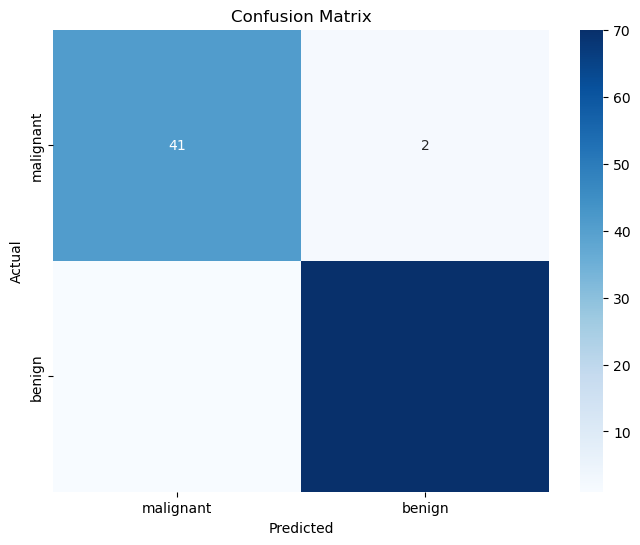

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2. Accuracy
* Calculate the ratio of correctly predicted instances to the total number of instances.

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


## 3. Precision
* Calculate the ratio of true positives to the sum of true positives and false positives.

In [35]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.97


## 4. Recall
* Calculate the ratio of true positives to the sum of true positives and false negatives.

In [36]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.99


## 5. F1 Score
* Calculate the harmonic mean of precision and recall.

In [37]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.98


## 6. ROC Curve and AUC
* Plot the ROC curve and calculate the AUC to evaluate the trade-offs between true positives and false positives.

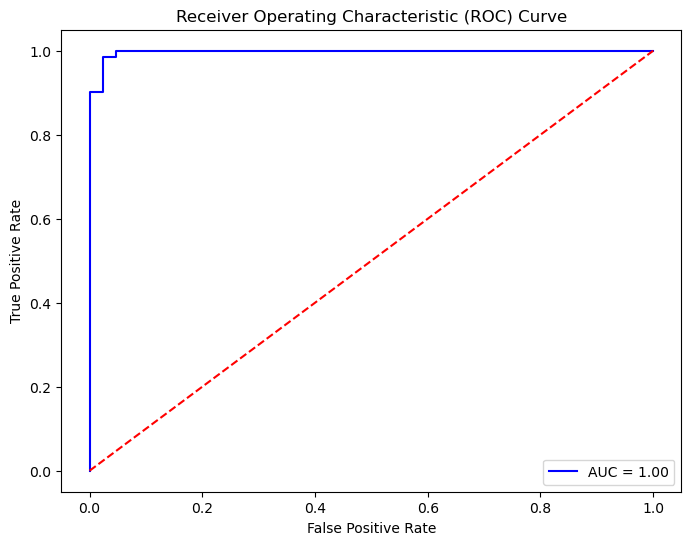

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 7. Classification Report
* Provide a summary of precision, recall, F1 score, and support for each class.

In [39]:
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 8. Cross-Validation
* Perform cross-validation to get a more robust estimate of model performance.

In [40]:
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validation Accuracy: 0.95 ± 0.02


## 9. Classification Report
* Provides a detailed summary of precision, recall, F1 score, and support for each class.

In [42]:
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

